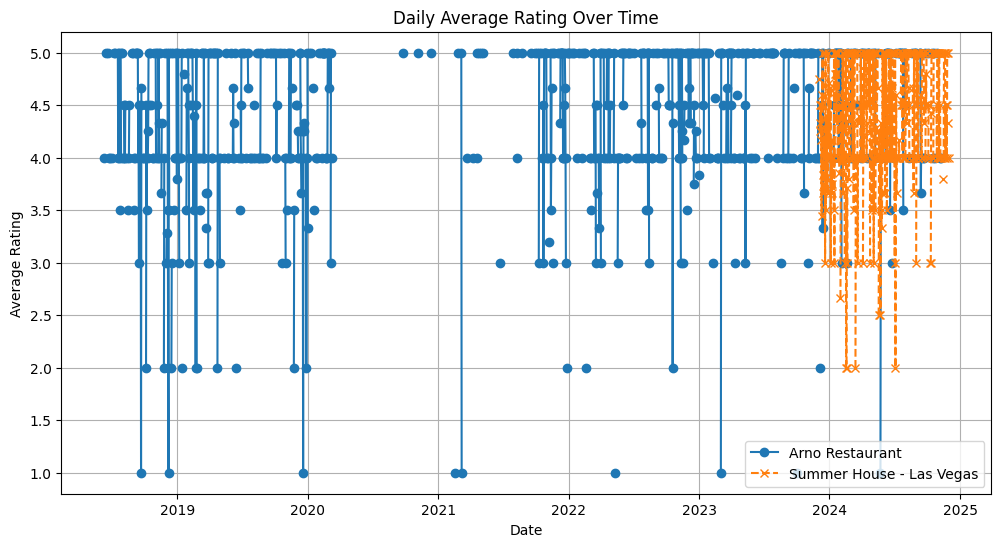

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


arno_restaurant_df = pd.read_csv('/content/arno_restaurant1.csv')
summer_house_df = pd.read_csv('/content/Summer House - Las Vegas.csv')


arno_restaurant_df['dates'] = pd.to_datetime(arno_restaurant_df['dates'].str.replace('Dined on ', ''))
summer_house_df['dates'] = pd.to_datetime(summer_house_df['dates'].str.replace('Dined on ', ''))


arno_daily_avg = arno_restaurant_df.set_index('dates').resample('D')['rating'].mean()
summer_daily_avg = summer_house_df.set_index('dates').resample('D')['rating'].mean()

plt.figure(figsize=(12, 6))
plt.plot(arno_daily_avg, label='Arno Restaurant', marker='o', linestyle='-')
plt.plot(summer_daily_avg, label='Summer House - Las Vegas', marker='x', linestyle='--')
plt.title('Daily Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-4-3510f10ae65a>:13: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  arno_yearly_avg = arno_restaurant_df.set_index('dates').resample('A')['rating'].mean()
<ipython-input-4-3510f10ae65a>:14: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  summer_yearly_avg = summer_house_df.set_index('dates').resample('A')['rating'].mean()


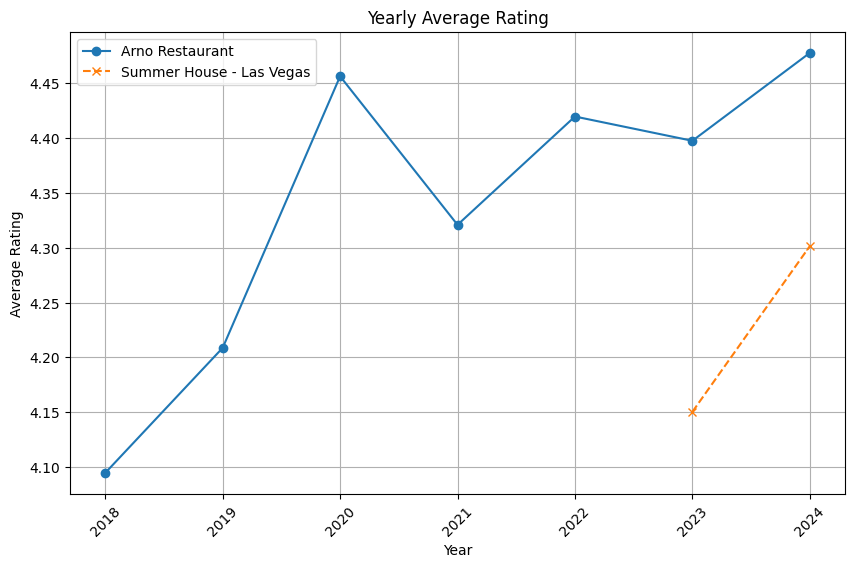

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


arno_restaurant_df = pd.read_csv('/content/arno_restaurant1.csv')
summer_house_df = pd.read_csv('/content/Summer House - Las Vegas.csv')


arno_restaurant_df['dates'] = pd.to_datetime(arno_restaurant_df['dates'].str.replace('Dined on ', ''))
summer_house_df['dates'] = pd.to_datetime(summer_house_df['dates'].str.replace('Dined on ', ''))

# Extract the year from the 'dates' column and average the ratings by year
arno_yearly_avg = arno_restaurant_df.set_index('dates').resample('A')['rating'].mean()
summer_yearly_avg = summer_house_df.set_index('dates').resample('A')['rating'].mean()


plt.figure(figsize=(10, 6))
plt.plot(arno_yearly_avg.index.year, arno_yearly_avg, label='Arno Restaurant', marker='o', linestyle='-')
plt.plot(summer_yearly_avg.index.year, summer_yearly_avg, label='Summer House - Las Vegas', marker='x', linestyle='--')
plt.title('Yearly Average Rating')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-6-dededfc2959c>:19: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  combined_yearly_avg = combined_df.set_index('dates').groupby([pd.Grouper(freq='A'), 'Restaurant'])['rating'].mean().unstack()


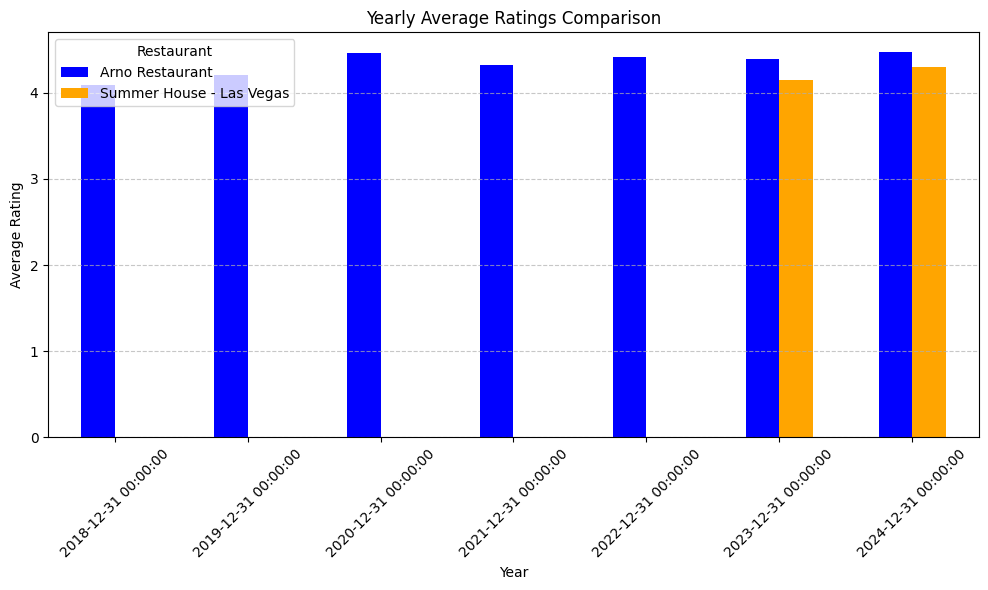

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


arno_restaurant_df = pd.read_csv('/content/arno_restaurant1.csv')
summer_house_df = pd.read_csv('/content/Summer House - Las Vegas.csv')

# Convert 'dates' columns to datetime format for both datasets
arno_restaurant_df['dates'] = pd.to_datetime(arno_restaurant_df['dates'].str.replace('Dined on ', ''))
summer_house_df['dates'] = pd.to_datetime(summer_house_df['dates'].str.replace('Dined on ', ''))

# Create a combined dataset for comparison
combined_df = pd.concat([
    arno_restaurant_df.assign(Restaurant='Arno Restaurant'),
    summer_house_df.assign(Restaurant='Summer House - Las Vegas')
])

# Calculate yearly average ratings for both restaurants
combined_yearly_avg = combined_df.set_index('dates').groupby([pd.Grouper(freq='A'), 'Restaurant'])['rating'].mean().unstack()


plt.figure(figsize=(10, 6))
combined_yearly_avg.plot(kind='bar', ax=plt.gca(), color=['blue', 'orange'])
plt.title('Yearly Average Ratings Comparison')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Restaurant')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
